#2. Деревья классификации CART

Задание:

Внимание: два варианта работы

Построить модель для распознавания целевой переменной (отклика)

Использовать тот же набор данных, что и в первой лабораторной работе.

Для распознавания использовать деревья классификации CART

Выбор критерия качества на Ваше усмотрение.

Обосновать выбор параметров модели.

Ожидается, что для подбора значений параметров будет использован GridSearch. Возможен выбор других стратегий подбора.



Ответ:

В данном задании была построена модель для распознавания целевой переменной (отклика) на основе Bank Marketing Data Set. Для распознавания использовался метод деревьев классификации CART. Критерием качества для данной выборки выбран Recall.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Атрибут 'duration' сильно влияет на цель вывода (например, если duration=0, то y='no'),
# поэтому эти данные отбрасываем для получения реалистичной прогностической модели

df = df.loc[df['duration'] != 0]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45208, 17)

In [ ]:
# Проверим сбалансированность выборки

df['y'].value_counts() # выборка не сбалансированная, тк разница в 8 раз

no     39919
yes     5289
Name: y, dtype: int64

In [ ]:
df['y'].value_counts(normalize=True) # выборка не сбалансированная, тк разница в 8 раз

no     0.883007
yes    0.116993
Name: y, dtype: float64

In [ ]:
# Получим новый датафрейм только со значением y=yes

df_one = df.loc[df['y'] == 'yes']
df_one.shape

(5289, 17)

In [ ]:
# Получим новый датафрейм только со значением y=no и обновим индексы

df_y = df.loc[df['y'] == 'no']
df_y = df_y.reset_index(drop=True)
df_y.shape

(39919, 17)

In [ ]:
# Отделим первые 10578 строк значений в датафрейме только со значением y=no

df_two = df_y.loc[:10577]
df_two.shape

(10578, 17)

In [ ]:
# Создадим новый датафрейм, состоящий из двойного набора данных со значением отклика y=yes (5289*2=10578 строк)
# и набора данных со значением отклика y=no (10578 строк)

df_new = pd.concat([df_one, df_one, df_two], ignore_index=True)
df_new.shape

(21156, 17)

In [ ]:
# Проверим сбалансированность выборки нового датафрейма

df_new['y'].value_counts() # выборка сбалансирована

yes    10578
no     10578
Name: y, dtype: int64

In [ ]:
df_new['y'].value_counts(normalize=True) # выборка сбалансирована

yes    0.5
no     0.5
Name: y, dtype: float64

{0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}


Text(0.5, 1.0, 'Распределение частотности классов в атрибуте job')

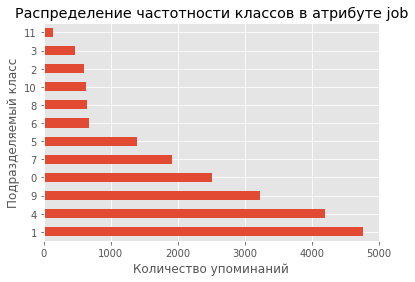

In [ ]:
# Заменим категориальные признаки на числовые

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
mapped_job = pd.Series(label_encoder.fit_transform(df_new['job']))

mapped_job.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

plt.xlabel('Количество упоминаний')
plt.ylabel('Подразделяемый класс')
plt.title('Распределение частотности классов в атрибуте job')

In [ ]:
categorical_columns = df_new.columns[df_new.dtypes == 'object'].union(['job'])
for column in categorical_columns:
    df_new[column] = label_encoder.fit_transform(df_new[column])
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
df_new.shape

(21156, 17)

In [ ]:
# Преобразуем в столбцы с различными уникальными значениями, которые могут принимать категориальные столбцы исходной выборки

onehot_encoder = OneHotEncoder(sparse=False)

encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df_new[categorical_columns]))
encoded_categorical_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
#  разделяю предикоторы и отклики

X = df_new.iloc[:, :-1].values  
y = df_new.iloc[:, 16].values  

In [ ]:
#  разделяю на обучающую и тестовую выборку

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)  

Стандартизация предикторов в данном случае, используя деревья классификации CART, бессмысленна, поэтому этот шаг опускаем

In [ ]:
# Этот блок кода предназначен для проверки:
# отдельно применили стандартизацию предикторов, после чего результаты действительно нисколько не поменялись

# Стандартизация предикторов

#from sklearn.preprocessing import StandardScaler 

#scaler = StandardScaler()   #   среднее 0, ст.отклонение 1
#scaler.fit(X_train)

#  Одинаковые параметры стандартизации у обучающего и тестового множества

#X_train_2 = scaler.transform(X_train)  
#X_test_2 = scaler.transform(X_test)

In [ ]:
#  Задаем параметры модели
#  Инициализируем модель

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42,
                               criterion='gini',              # функция для impurity ('gini' или 'entropy')                              
                               max_depth=6,                   # максимальная глубина дерева                           
                               max_leaf_nodes=None,           # максимальное число конечных узлов (сейчас - без ограничений)                        
                               min_samples_split=10,          # минимальное число элементов в узле для разбиения                       
                               min_samples_leaf=8,            # минимальное число элементов в потомке                  
                               min_impurity_decrease=0.001,   # минимальное значение уменьшения загрязнения                              
                               class_weight=None,             # веса классов                        
                               min_weight_fraction_leaf=0,    # используем, если задаем веса классов                            
                               splitter='best',
                               max_features=None)

model.fit(X_train, y_train) # обучаем модель

DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.001,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0, random_state=42)

In [ ]:
# Распознаем, используя дерево CART

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Распознаем вероятности принадлежать классам

y_pred_train2 = model.predict_proba(X_train)
y_pred_test2 = model.predict_proba(X_test)

In [ ]:
# Оценим ценность каждой фичи в смысле её эффективности для разбиения (Gini importance)

pd.DataFrame({'feature': df_new.iloc[:, :-1].columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
8,contact,0.897765
11,duration,0.079446
10,month,0.022789
0,age,0.000000
1,job,0.000000
2,marital,0.000000
3,education,0.000000
4,default,0.000000
5,balance,0.000000
6,housing,0.000000


Согласно результату выше, можно сделать вывод, что информативными являются только 8,11,10.
Остальные - неинформативны, их можно убрать и не учитывать

In [ ]:
# Таблица сопряженности. Измеряем, насколько хороша модель

from sklearn import metrics

# Обучающая выборка

print(u'Таблица сопряженности для обучающей выборки')

conf_mat = metrics.confusion_matrix(y_train, y_pred_train)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

Таблица сопряженности для обучающей выборки


,0,1
0,6980,112
1,352,6730


In [ ]:
# Тестовая выборка

print(u'Таблица сопряженности для тестовой выборки')

conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

Таблица сопряженности для тестовой выборки


,0,1
0,3429,57
1,186,3310


In [ ]:
# Получим recall на обучающей и тестовой выборках

from sklearn.metrics import recall_score

print('Recall на обучающей выборке', recall_score(y_train, y_pred_train)*100)
print('Recall на тестовой выборке', recall_score(y_test, y_pred_test)*100)

Recall на обучающей выборке 95.02965264049703
Recall на тестовой выборке 94.67963386727689


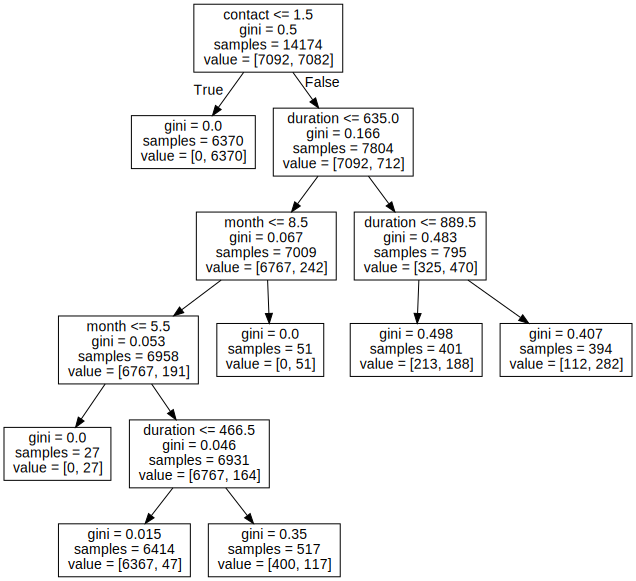

In [ ]:
# Построим дерево классификации

from graphviz import Source
from sklearn import tree
Source(tree.export_graphviz(model, out_file=None, feature_names=df.iloc[:, :-1].columns))

# gini - загрязненность узла
# value - распределение наблюдений по классам
# чем выше переменная используется при расщеплении, тем она важнее для построения окончательного дерева

In [ ]:
# Построим матрицу ошибок

from sklearn import metrics

print(u'Матрица ошибок')

conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

Матрица ошибок


,0,1
0,3429,57
1,186,3310


In [ ]:
# Посчитаем precision, recall и f1-score

print(metrics.classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3615
           1       0.95      0.98      0.96      3367

    accuracy                           0.97      6982
   macro avg       0.97      0.97      0.97      6982
weighted avg       0.97      0.97      0.97      6982



In [ ]:
# Активируем поиск на решетке (перебор) GridSearchCV

from sklearn.model_selection import GridSearchCV

# Инициализируем модель

model_2 = DecisionTreeClassifier(random_state=42,
                               criterion='gini',                             
                               max_depth=6,                  # максимальная глубина дерева
                               max_leaf_nodes=None,                         
                               min_samples_split=10,         # минимальное число элементов в узле для разбиения   
                               min_samples_leaf=8,           # минимальное число элементов в листе
                               min_impurity_decrease=0.001,
                               class_weight=None,
                               min_weight_fraction_leaf=0,                                                   
                               splitter='best',
                               max_features = None)

In [ ]:
# Определяем значения гиперпараметров

params_set = {
  'max_depth': [2, 4, 6],
  'min_samples_leaf': [4, 6, 8],
  'min_samples_split': [6, 8, 10]}

# Проводим 5-fold кросс-валидацию

grid_CV_1 = GridSearchCV(estimator=model_2,
                        param_grid=params_set,
                        scoring='recall',        # выбор критерия качества    
                        cv=5,                    # 5 фолдов
                        n_jobs=-1)

# Обучаем на обучающей выборке

grid_CV_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6,
                                              min_impurity_decrease=0.001,
                                              min_samples_leaf=8,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [6, 8, 10]},
             scoring='recall')

In [ ]:
# Лучший набор значений гиперпараметров

best_hyperparams = grid_CV_1.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 6}


In [ ]:
# Значение критерия качества для лучших значений гиперпараметров 

best_CV_score = grid_CV_1.best_score_
print('Лучший recall', best_CV_score)

Лучший recall 0.9679471231096173


In [ ]:
# Лучшая модель

best_model = grid_CV_1.best_estimator_
test_recall = best_model.score(X_test,y_test)
print('Лучший recall на тестовом множестве', test_recall)

Лучший recall на тестовом множестве 0.9616155829275279


In [ ]:
# Более подробное представление результатов

means = grid_CV_1.cv_results_['mean_test_score']
stds  = grid_CV_1.cv_results_['std_test_score']

In [ ]:
means

array([0.96794712, 0.96794712, 0.96794712, 0.96794712, 0.96794712,
       0.96794712, 0.96794712, 0.96794712, 0.96794712, 0.95184822,
       0.95184822, 0.95184822, 0.95184822, 0.95184822, 0.95184822,
       0.95184822, 0.95184822, 0.95184822, 0.95283692, 0.95283692,
       0.95283692, 0.95283692, 0.95283692, 0.95283692, 0.95283692,
       0.95283692, 0.95283692])

In [ ]:
for mean, std, params in zip(means, stds, grid_CV_1.cv_results_['params']):
    print("%0.4f (+/-%0.03f) for %r"  % (mean, std * 2, params))
print()

0.9679 (+/-0.013) for {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 6}
0.9679 (+/-0.013) for {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.9679 (+/-0.013) for {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.9679 (+/-0.013) for {'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 6}
0.9679 (+/-0.013) for {'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 8}
0.9679 (+/-0.013) for {'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 10}
0.9679 (+/-0.013) for {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 6}
0.9679 (+/-0.013) for {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 8}
0.9679 (+/-0.013) for {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 10}
0.9518 (+/-0.013) for {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 6}
0.9518 (+/-0.013) for {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.9518 (+/-0.013) for {'max_depth': 4, 'min_samples